# Abstract

## Neural Network Type Classification | TMNIST

The objective of this notebook is to carry out character recognition on the TMNIST dataset, which encompasses 94 distinct characters. To achieve this, I have implemented a straightforward convolutional neural network (CNN) composed of three layers. Upon evaluation, the CNN demonstrated a commendable performance, achieving an accuracy rate of approximately 93.37%. This level of accuracy is quite impressive, considering the relative simplicity of the CNN's architecture.

In [3]:
!pip install gdown

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
import gdown

# Replace 'FILE_ID' with the actual File ID
file_id = '1tZu5WALwwTp3Aa8TtFgvIrtbTRbPHu5g'

# Define the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Define the output file name
output_file = '94_character_TMNIST.csv'

# Download the file
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1tZu5WALwwTp3Aa8TtFgvIrtbTRbPHu5g
To: /content/94_character_TMNIST.csv
100%|██████████| 941M/941M [00:08<00:00, 106MB/s] 


'94_character_TMNIST.csv'

Load TMNIST Dataset into dataframe

In [6]:
data = pd.read_csv('94_character_TMNIST.csv')

# Display the first few rows of the DataFrame
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274093 entries, 0 to 274092
Columns: 786 entries, names to 784
dtypes: float64(784), object(2)
memory usage: 1.6+ GB


names     0
labels    0
1         0
2         0
3         0
         ..
780       0
781       0
782       0
783       0
784       0
Length: 786, dtype: int64

In [9]:
print(data.columns)

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)


Separate the input features from the output labels.
The resulting features DataFrame will be used to train the model and contains only the data necessary for learning.

In [8]:
# Features for the model (Dropping unnecessary columns to isolate features)
features = data.drop(['labels', 'names'], axis=1)

# Isolating the target variable
labels = data['labels']

Creating two dictionaries. One that maps numerical values to labels, and another that maps labels back to numerical values. This is useful for encoding and decoding categorical labels.

In [10]:
# Extract unique labels from the data
unique_labels = data['labels'].unique()

# Create a dictionary mapping each label to a unique integer value
label_to_value = {label: index for index, label in enumerate(unique_labels)}

# Create a reverse dictionary mapping each integer value back to its corresponding label
value_to_label = {index: label for label, index in label_to_value.items()}

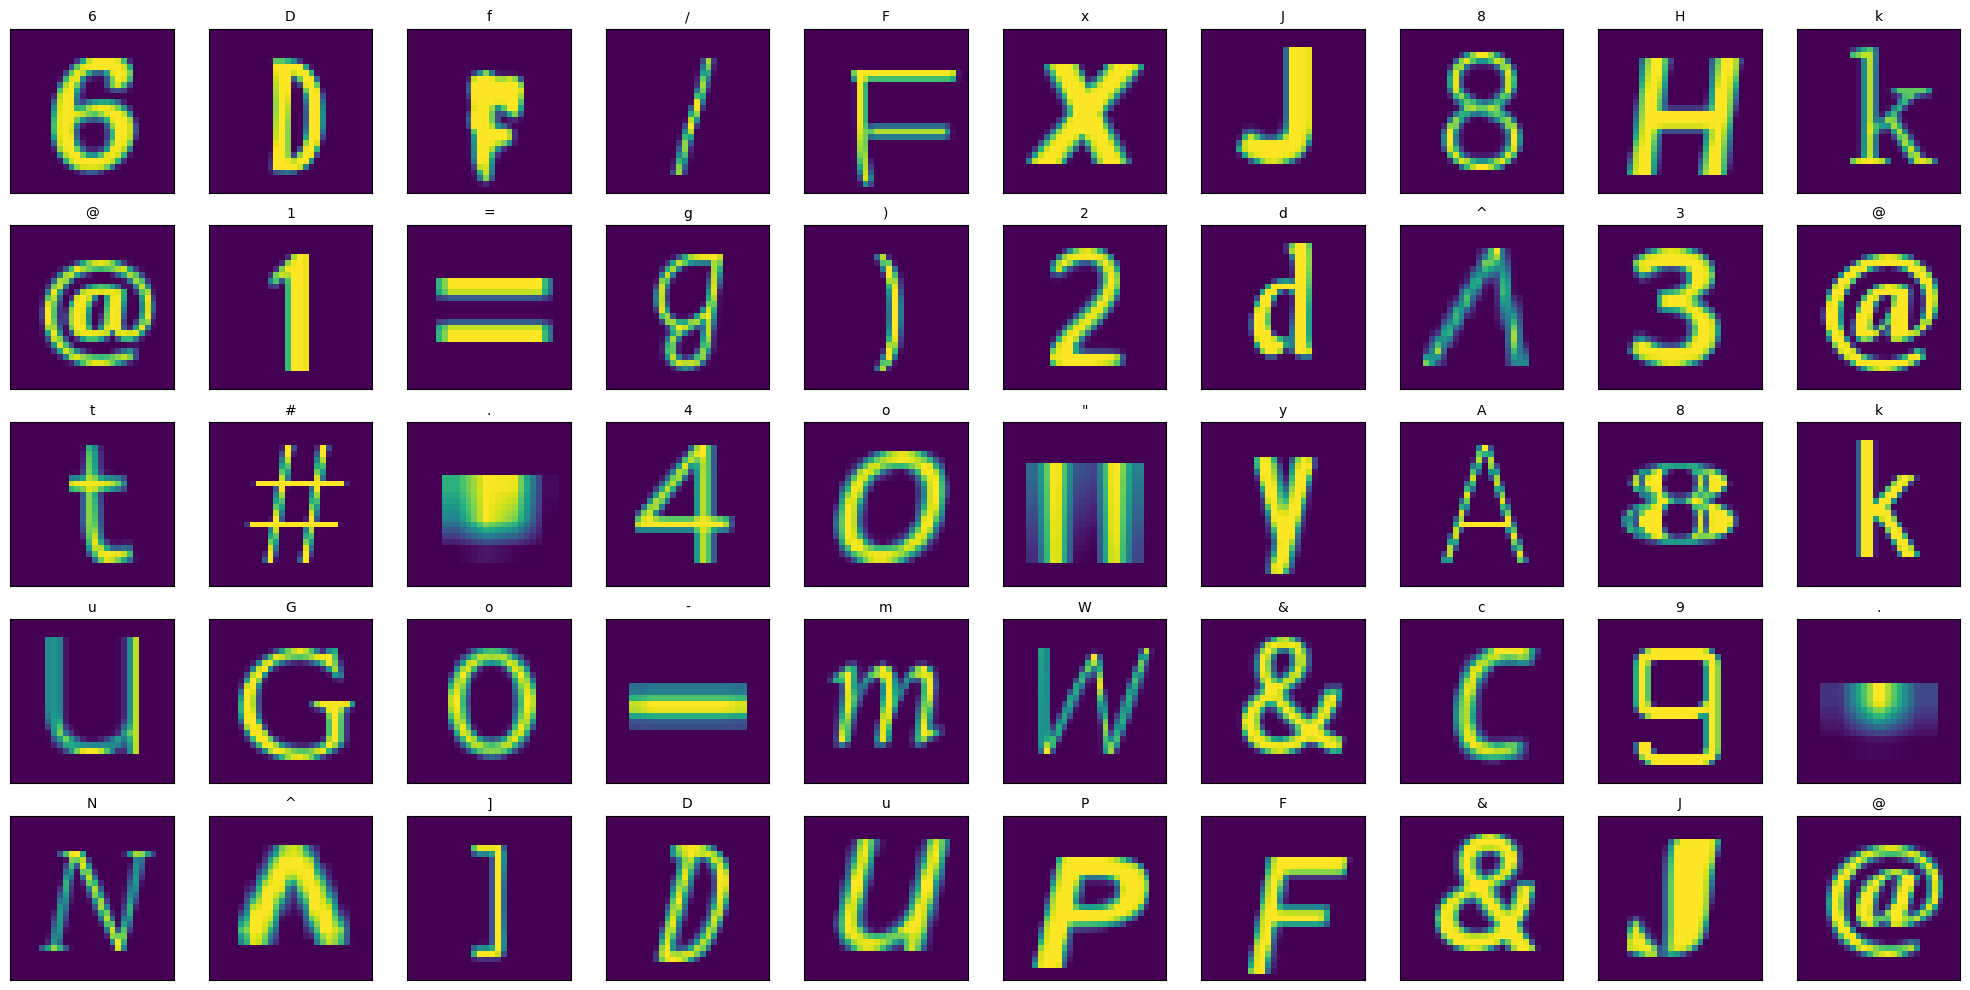

In [11]:
import matplotlib.pyplot as plt

# Set the size of the entire figure
plt.figure(figsize=(20, 10))

# Plot the first 50 images and labels
for i in range(50):
    # Add a new subplot iteratively
    plt.subplot(5, 10, i + 1)

    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

    # Set the title of each subplot to be the corresponding label
    plt.title(labels.iloc[i], fontsize=10)

    # Reshape the feature vector to 28x28 and plot it
    image = features.values[i].reshape(28, 28)
    plt.imshow(image, cmap='viridis')

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( features, labels, test_size=0.20, random_state=42)

Categorical labels are converted into a format that is suitable for training machine learning models, especially neural networks, which require numerical input. This method also ensures that the model treats each category as a separate feature without assuming any ordinal relationship between them.

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the y_train data and transform y_train
y_train_encoded = enc.fit_transform(y_train.values.reshape(-1, 1))

# Transform y_test data using the same encoder
y_test_encoded = enc.transform(y_test.values.reshape(-1, 1))

y_train_encoded = y_train_encoded.astype('float32')
y_test_encoded = y_test_encoded.astype('float32')

# Return the transformed y_train and y_test
y_train_encoded, y_test_encoded

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

The original data is in a flattened format, where each image is represented as a long array of pixel values. The reshaping is necessary because Convolutional Neural Networks (CNNs) require input data in a specific shape - typically, the height x width x channels of the image.

This do not change the content of the images but modify their format to be suitable for processing by the neural network. So after reshaping, the images can be processed by the convolutional layers of a CNN, and after normalization, the model can train more efficiently

In [14]:
num_pixels = 28 * 28
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)  # -1 infers the number of samples
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the pixel values of the images to be between 0 and 1
# This is done by converting the datatype to float32 and dividing by the max pixel value (255)
X_train_normalized = X_train_reshaped.astype('float32') / 255.
X_test_normalized = X_test_reshaped.astype('float32') / 255.

# Print out the new shapes of the training and test datasets
print('Shape of X_train after reshaping and normalization:', X_train_normalized.shape)
print('Shape of X_test after reshaping and normalization:', X_test_normalized.shape)

Shape of X_train after reshaping and normalization: (219274, 28, 28, 1)
Shape of X_test after reshaping and normalization: (54819, 28, 28, 1)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_data = data_generator.flow(X_train_reshaped, batch_size=32)

In [41]:
print("Shape of the first image:", augmented_images[0].shape)


Shape of the first image: (28, 1)


A Convolutional Neural Network (CNN) using TensorFlow's Keras API. CNNs have proven exceptionally effective for image recognition tasks due to their ability to capture spatial hierarchies in data. Here CNN will process images, learn distinguishing features, and classify them into various categories.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Second Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Third Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Flattening the output to feed into a Dense layer
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))  # Dropout to reduce overfitting

# Fully Connected Layer 2 (Output Layer)
# The number of neurons equals the number of classes
num_classes = data['labels'].nunique()
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


* model.compile() configures the model for training.
* optimizer='adam' is an algorithm for gradient descent optimization.
* loss='categorical_crossentropy' is the loss function, suitable for multi-class classification.
* metrics=['accuracy'] means that the model will track accuracy during training.

The "sequential" model is a medium-sized CNN appropriate for image classification tasks. It uses a series of convolutional layers to extract features from the input data, pooling layers to reduce dimensionality, and dropout layers to combat overfitting. Finally, it employs dense layers to make predictions across multiple classes. The architecture is designed to learn a hierarchy of features with increasing levels of abstraction, which is typical for deep learning models applied to visual recognition tasks.

In [16]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0


The model consists of several layers, each designed to process image data and ultimately classify the images into one of 94 classes.

* The model has a total of 184,862 parameters, all of which are trainable. This means the model has nearly 185k values that will be adjusted during the training process to minimize the classification error.

* The total size of the model is approximately 722.12 KB, which represents the memory footprint required to store the model's parameters.

In [17]:
# For features
print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)

# For labels
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)

Shape of X_train_normalized: (219274, 28, 28, 1)
Shape of X_test_normalized: (54819, 28, 28, 1)
Shape of y_train_encoded: (219274, 94)
Shape of y_test_encoded: (54819, 94)


In [18]:
print("Data type of X_train_normalized:", X_train_normalized.dtype)
print("Data type of y_train_encoded:", y_train_encoded.dtype)

Data type of X_train_normalized: float32
Data type of y_train_encoded: float32


In [25]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Keras to adjust the learning rate according to the scheduler function at the end of each epoch during training to avoid overshooting the minimum and can potentially lead to a better and more stable model.

In [19]:
history = model.fit(X_train_normalized, y_train_encoded, validation_data=(X_test_normalized, y_test_encoded), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
3427/3427 [==============================] - 555s 161ms/step - loss: 0.7703 - accuracy: 0.7765 - val_loss: 0.3437 - val_accuracy: 0.8895
Epoch 2/10
3427/3427 [==============================] - 496s 145ms/step - loss: 0.4023 - accuracy: 0.8723 - val_loss: 0.3190 - val_accuracy: 0.8902
Epoch 3/10
3427/3427 [==============================] - 506s 148ms/step - loss: 0.3436 - accuracy: 0.8925 - val_loss: 0.2490 - val_accuracy: 0.9219
Epoch 4/10
3427/3427 [==============================] - 495s 145ms/step - loss: 0.3159 - accuracy: 0.8999 - val_loss: 0.2257 - val_accuracy: 0.9298
Epoch 5/10
3427/3427 [==============================] - 516s 151ms/step - loss: 0.3014 - accuracy: 0.9049 - val_loss: 0.2222 - val_accuracy: 0.9299
Epoch 6/10
3427/3427 [==============================] - 496s 145ms/step - loss: 0.2868 - accuracy: 0.9085 - val_loss: 0.2163 - val_accuracy: 0.9308
Epoch 7/10
3427/3427 [==============================] - 490s 143ms/step - loss: 0.2809 - accuracy: 0.9101 - val_

Evaluating a trained machine learning model's performance on a test dataset and making predictions with that model.

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print("Test accuracy:", test_accuracy)

y_labels_pred = model.predict(X_test_normalized)

1714/1714 [==============================] - 40s 23ms/step - loss: 0.2045 - accuracy: 0.9337
Test accuracy: 0.9337091445922852
1714/1714 [==============================] - 30s 18ms/step


In [23]:
# Evaluate the model on the test dataset
evaluation = model.evaluate(X_test_normalized, y_test_encoded, batch_size=64, verbose=1)

# Extract loss and accuracy from the evaluation result
test_loss, test_accuracy = evaluation[0], evaluation[1]

# Print a formatted summary of the results
print(f'\nTest Evaluation Summary:')
print(f'\tTest Loss: {test_loss:.2f} - This value represents the average loss of the model on the test dataset.')
print(f'\tTest Accuracy: {test_accuracy * 100:.2f}% - This percentage indicates how often the model correctly predicted the label out of all test samples.')

857/857 [==============================] - 33s 39ms/step - loss: 0.2045 - accuracy: 0.9337

Test Evaluation Summary:
	Test Loss: 0.20 - This value represents the average loss of the model on the test dataset.
	Test Accuracy: 93.37% - This percentage indicates how often the model correctly predicted the label out of all test samples.


In [24]:
# Make predictions
predictions = model.predict(X_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)

# Inverse transform your encoded y_test data to its original form if it's one-hot encoded
true_classes = np.argmax(y_test_encoded, axis=1)

1714/1714 [==============================] - 35s 20ms/step


Outputs the probability distributions across all classes for each image.

Each image is displayed with two labels: the true label and the model's predicted label. This dual labeling helps in directly observing the instances where our model performs well and where it makes errors.

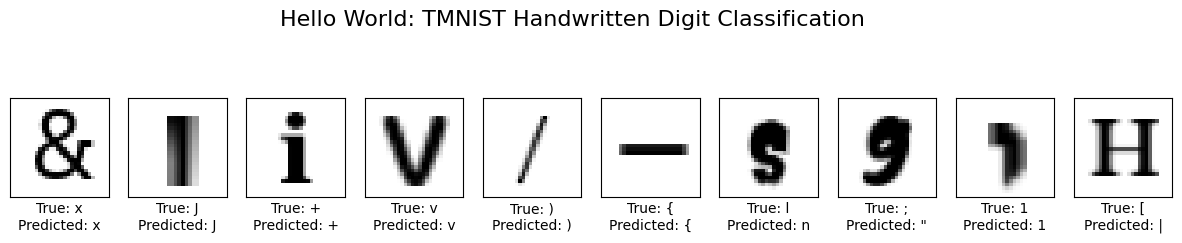

In [27]:
# number of images you want to display
num_images_to_display = 10

# Set up the figure
plt.figure(figsize=(15, 5))

# Add a main title to the figure
plt.suptitle('Hello World: TMNIST Handwritten Digit Classification', fontsize=16)

for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test_normalized[i].reshape(28, 28), cmap=plt.cm.binary)
    # Label each image with its corresponding true and predicted labels
    plt.xlabel(f"True: {value_to_label[true_classes[i]]}\nPredicted: {value_to_label[predicted_classes[i]]}")

# Show the plot
plt.show()

a convolutional neural network (CNN) for the task of character recognition within the TMNIST dataset, which contains 94 different characters.

1/1 [==============================] - 0s 59ms/step


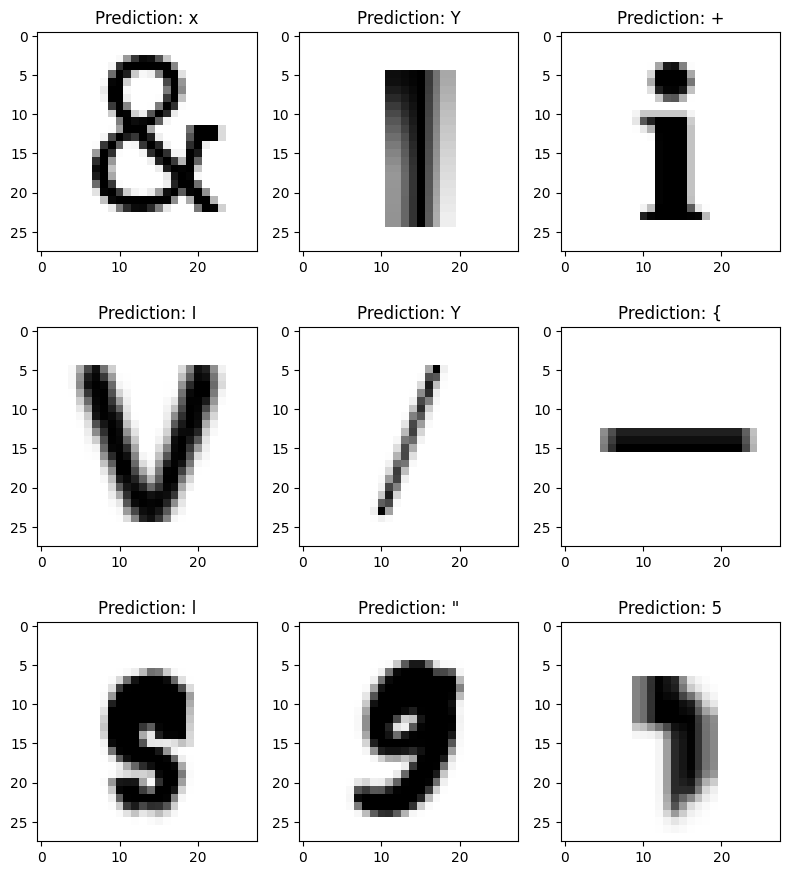

In [47]:
# Predicting characters using the trained model and displaying the results
fig, axes = plt.subplots(3, 3, figsize=(8, 9))  # Set up a 3x3 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
label_dict_inv = {v: k for k, v in label_to_value.items()}
X_test_np = X_test.to_numpy()
for i, ax in enumerate(axes):
    #img = np.reshape(X_test.iloc[i].to_numpy(), (28, 28))
    img = np.reshape(X_test_np[i], (28, 28))
    ax.imshow(img, cmap="Greys")  # Display the image in grayscale

    img_for_prediction = np.reshape(img, (1, 28, 28, 1))  # Reshape the image for model input
    pred_class_index = np.argmax(model.predict(img_for_prediction))  # Predict the class
    predicted_label = label_dict_inv[pred_class_index]  # Retrieve the label from the dictionary

    ax.set_title(f"Prediction: {predicted_label}")  # Set the title with the predicted label
    ax.grid(False)  # Disable the grid for a cleaner look

plt.tight_layout()  # Adjust layout for better visibility
plt.show()  # Display the plot


In [29]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit()
history_dict = history.history

# Values of loss and accuracy during training
train_loss = history_dict['loss']
train_accuracy = history_dict['accuracy']

# Values of loss and accuracy during validation
val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

Plot for training and validation loss

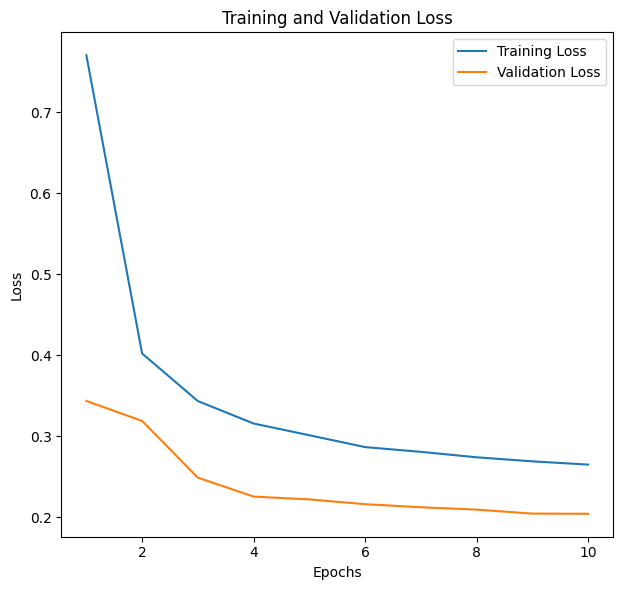

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Plot for training and validation accuracy

* The Training Loss (depicted in blue) shows a sharp decrease initially, then levels off, reflecting the model's rapid initial learning and subsequent stabilization as it begins to converge.
* The Validation Loss (depicted in orange) decreases at a slower rate compared to the training loss. The convergence of validation loss at a higher value than training loss is typical and reflects the discrepancy between the model's performance on training versus unseen data.

The fact that both losses are decreasing is a positive sign, indicating that the model is learning.

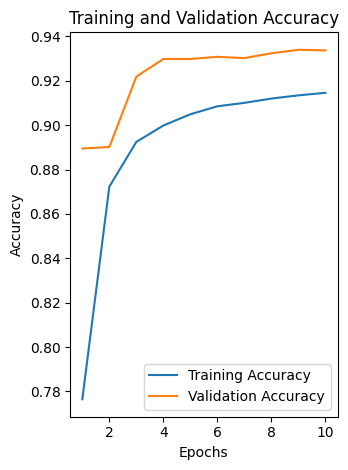

In [31]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

* The Training Accuracy (depicted in blue) starts at a high value and steadily increases over epochs, suggesting that the model is effectively learning from the training data.

* The Validation Accuracy (depicted in orange) also starts high and appears to plateau as epochs progress. This trend is indicative of the model's ability to generalize to new, unseen data.

* The accuracy values, both for training and validation, are quite high, indicating a strong performance of the model.